# This Python 3 environment comes with many helpful analytics libraries installed


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [6]:
import numpy as np
import pandas as pd
import os 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import xgboost as xgb
import seaborn as sns
from sklearn.model_selection import GridSearchCV
for dirname, _, filenames in os.walk('/kaggle/input'): 
    for filename in filenames: 
        print(os.path.join(dirname, filename))

/kaggle/input/alzheimers-disease-dataset/alzheimers_disease_data.csv


In [7]:
df = pd.read_csv("/kaggle/input/alzheimers-disease-dataset/alzheimers_disease_data.csv")
df.sample(10)

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
624,5375,78,0,3,1,21.507828,0,15.624840,2.984279,2.063694,...,0,0,4.598842,0,0,0,0,0,1,XXXConfid
576,5327,84,0,1,2,33.744975,1,6.071954,0.133559,3.973449,...,0,0,4.128294,1,0,0,0,0,1,XXXConfid
507,5258,74,0,0,1,22.292320,0,11.283332,4.076330,5.493093,...,0,1,0.556268,0,0,0,0,0,1,XXXConfid
1943,6694,74,0,0,1,17.854387,0,7.338498,7.009846,8.369580,...,1,0,8.359130,0,1,0,0,1,1,XXXConfid
1176,5927,66,0,0,2,38.653961,0,3.167948,5.528618,3.778655,...,1,0,7.033275,1,0,0,1,0,0,XXXConfid
1982,6733,71,0,1,1,15.138279,0,3.570242,0.331743,3.376891,...,0,1,5.023993,0,0,0,0,1,1,XXXConfid
702,5453,62,1,0,0,26.331550,1,18.235543,8.106837,7.337808,...,0,0,1.890591,1,1,0,0,1,0,XXXConfid
392,5143,87,1,1,2,39.810995,0,0.612862,7.587744,8.778157,...,0,0,4.584014,0,0,0,0,0,1,XXXConfid
1286,6037,87,1,0,3,24.788291,0,1.366957,8.556911,7.902727,...,0,0,0.912227,1,0,0,0,0,0,XXXConfid
872,5623,63,0,0,1,38.934491,0,0.904003,2.122938,5.059234,...,0,0,1.318268,0,0,1,0,1,0,XXXConfid


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [9]:
df["DoctorInCharge"].nunique()

1

In [10]:
sum(df["Diagnosis"])/len(df["Diagnosis"])

0.35365286179618427

In [11]:
X = df.drop(columns=["Diagnosis","DoctorInCharge"]).copy()
y = df["Diagnosis"].copy()
X.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness'],
      dtype='object')

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, stratify=y)

In [13]:
model = xgb.XGBClassifier()

In [14]:
param_grid = {
    'n_estimators': [50, 100, 250, 500, 1000],  
    'max_depth': [3, 4, 5, 6, 7],          
    'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.5], 
    "gamma" : [0.01, 0.05, 0.1]
           
    
}

In [15]:
GS = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='roc_auc',
    refit=True,
    cv=5
)

In [16]:
GS.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'gamma': [0.01, 0.05, 0.1],
                         'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.5],
                         'max_depth': [3, 4, 5, 6, 7],
                         'n_estimators': [50, 100, 250, 500, 1000]},
             scoring='roc_auc')

In [17]:
print(GS.best_params_)
print(GS.best_score_)
best_model = GS.best_estimator_

{'gamma': 0.1, 'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 50}
0.9896734334876323


In [18]:
pred = best_model.predict(X_test)
preds = pd.Series(pred, index=y_test.index, name="predictions")

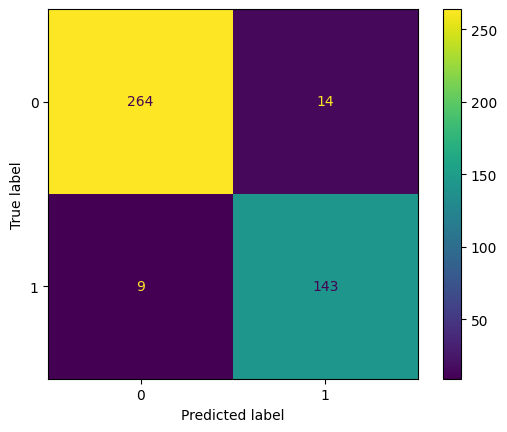

In [19]:
cm = confusion_matrix(y_test, preds, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=best_model.classes_)
disp.plot()

In [ ]:
merged_df = pd.concat([y_test, preds], axis=1)

merged_df["Correct"] = (merged_df["Diagnosis"]==merged_df["predictions"]).astype(int)
correct_and_false = pd.DataFrame(merged_df["Correct"].value_counts())
correct_and_false
sns.barplot(correct_and_false, x=correct_and_false.index, y="count")

In [ ]:
merged_df["Correct"].value_counts()